In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# One-hot encode labels (0–9 → [0,0,...,1,...,0])
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def build_model(activation):
    model = keras.Sequential([
        layers.Input(shape=(784,)),                # input layer
        layers.Dense(128, activation=activation),  # hidden layer
        layers.Dense(64, activation=activation),   # hidden layer
        layers.Dense(10, activation="softmax")     # output layer (10 classes)
    ])
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [ ]:
# Build models
model_relu = build_model("relu")
model_sigmoid = build_model("sigmoid")

# Train models
history_relu = model_relu.fit(x_train, y_train,
                              validation_split=0.1,
                              epochs=10, batch_size=128, verbose=1)

history_sigmoid = model_sigmoid.fit(x_train, y_train,
                                    validation_split=0.1,
                                    epochs=10, batch_size=128, verbose=1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8138 - loss: 0.6671 - val_accuracy: 0.9602 - val_loss: 0.1436
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9563 - loss: 0.1531 - val_accuracy: 0.9698 - val_loss: 0.1043
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9704 - loss: 0.1002 - val_accuracy: 0.9707 - val_loss: 0.1007
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9777 - loss: 0.0744 - val_accuracy: 0.9750 - val_loss: 0.0845
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9831 - loss: 0.0575 - val_accuracy: 0.9747 - val_loss: 0.0874
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9862 - loss: 0.0458 - val_accuracy: 0.9758 - val_loss: 0.0775
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9775 - val_loss: 0.0801
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0281 - val_accuracy: 0.

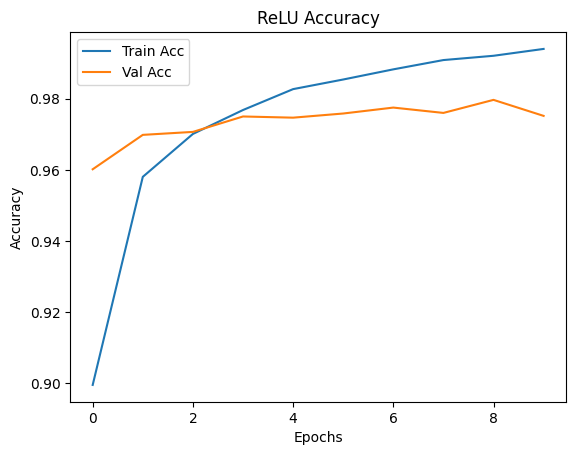

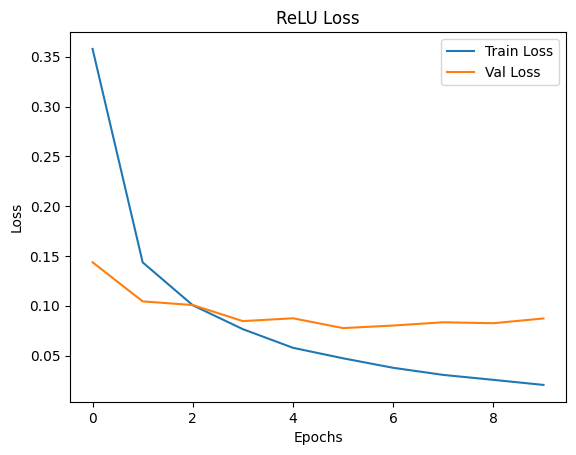

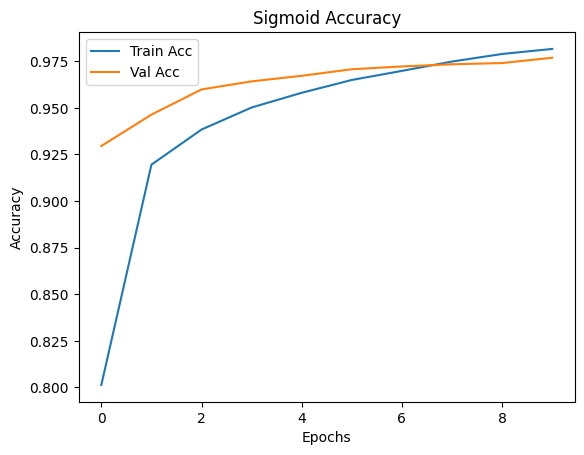

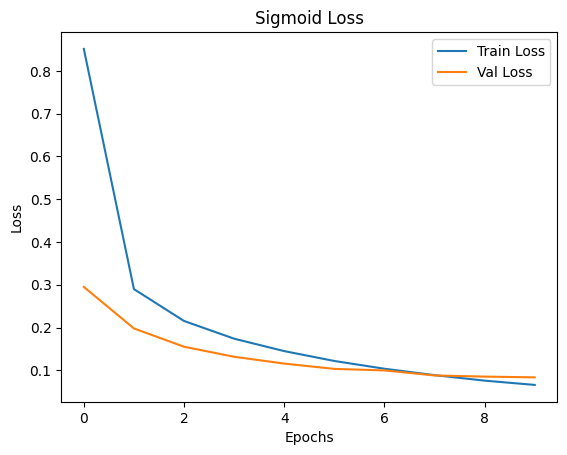

In [ ]:
def plot_history(history, title):
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title(title + " Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(title + " Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Plot for both models
plot_history(history_relu, "ReLU")
plot_history(history_sigmoid, "Sigmoid")


In [ ]:
# Test accuracy comparison
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test, verbose=0)
test_loss_sig, test_acc_sig = model_sigmoid.evaluate(x_test, y_test, verbose=0)

print("ReLU Test Accuracy:", test_acc_relu)
print("Sigmoid Test Accuracy:", test_acc_sig)


ReLU Test Accuracy: 0.9764000177383423
Sigmoid Test Accuracy: 0.9728000164031982


In [ ]:
print("\nAnalysis:")
print(" ReLU usually learns faster and gives better accuracy.")
print("Sigmoid is slower and may get stuck because gradients become small.")
print(" That’s why ReLU is preferred in modern neural networks.")



Analysis:
 ReLU usually learns faster and gives better accuracy.
Sigmoid is slower and may get stuck because gradients become small.
 That’s why ReLU is preferred in modern neural networks.
